In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

In [2]:
data = pd.read_csv('data.csv')
del data['Unnamed: 0']

Text(0, 0.5, 'Publications')

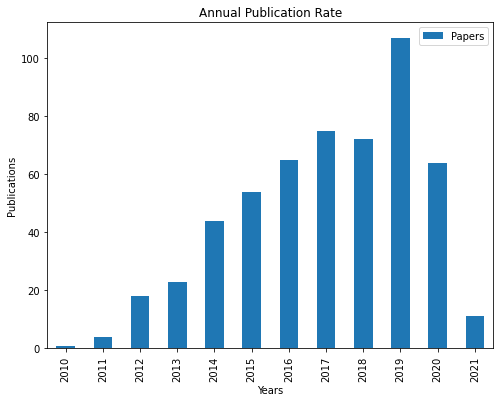

In [4]:
# Annual Publication Rate

years_unique = list(range(2010, 2022))

annual_pub_rate = pd.DataFrame()
annual_pub_rate['Years'] = years_unique
annual_pub_rate['Papers'] = 0

for index in range(len(data)):

    year = int(data.iloc[index, 3])
    year_index = years_unique.index(year)
    year_val = annual_pub_rate.iloc[year_index, 1]
    annual_pub_rate.iloc[year_index, 1] = year_val + 1

plt.rcParams["figure.figsize"] = (8,6)

annual_pub_rate.plot.bar(x = 'Years', y = 'Papers')
plt.title('Annual Publication Rate')
plt.ylabel('Publications')

Text(0, 0.5, 'Citations')

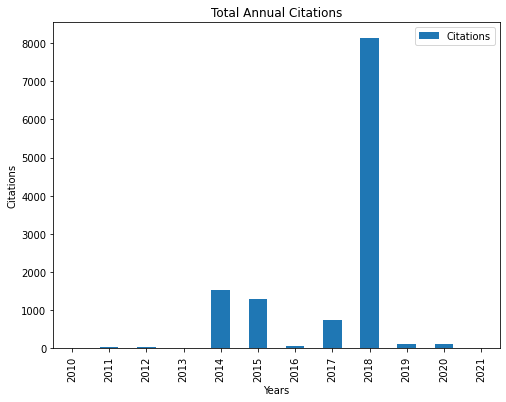

In [5]:
# Total Annual Citations 

annual_cit = pd.DataFrame()
annual_cit['Years'] = list(range(2010, 2022))
annual_cit['Citations'] = 0

for index in range(len(data)):

    year = int(data.iloc[index, 3])
    year_index = list(range(2010, 2022)).index(year)
    year_citations = int(annual_cit.iloc[year_index, 1])
    article_citations = int(data.iloc[year_index, 11])
    annual_cit.iloc[year_index, 1] = year_citations + article_citations

annual_cit.plot.bar(x = 'Years', y = 'Citations')
plt.title('Total Annual Citations')
plt.ylabel('Citations')

In [6]:
# Most cited articles globally according to citation count

citations = data.sort_values(by = ['Cited by'], ascending = False).head(10)

for index in range(len(citations)):
    print('[{}] - {}, {}'.format(citations.iloc[index, 11], citations.iloc[index, 2], citations.iloc[index, 0]))

[209.0] - Advanced Persistent threats and how to monitor and deter them, Tankard C.
[202.0] - Advanced social engineering attacks, Krombholz K., Hobel H., Huber M., Weippl E.
[141.0] - A study on advanced persistent threats, Chen P., Desmet L., Huygens C.
[140.0] - FlipIt: The game of "stealthy takeover", Van Dijk M., Juels A., Oprea A., Rivest R.L.
[113.0] - Targeted cyberattacks: A superset of advanced persistent threats, Sood A.K., Enbody R.J.
[112.0] - The big four - What we did wrong in advanced persistent threat detection?, Virvilis N., Gritzalis D.
[110.0] - Combating advanced persistent threats: From network event correlation to incident detection, Friedberg I., Skopik F., Settanni G., Fiedler R.
[94.0] - A Hierarchical Security Framework for Defending Against Sophisticated Attacks on Wireless Sensor Networks in Smart Cities, Wu J., Ota K., Dong M., Li C.
[88.0] - Detecting APT malware infections based on malicious DNS and traffic analysis, Zhao G., Xu K., Xu L., Wu B.
[79.0] -

In [7]:
# Authors with the most documents

authors_dict = {}

for index in range(len(data)):
    authors = data.iloc[index, 1].split(';')[:-1]
    
    for author in authors:
        if author in authors_dict.keys():
            val = authors_dict[author]
            authors_dict[author] = val + 1
        else:
            authors_dict[author] =  1
            
for author in sorted(authors_dict, key = authors_dict.get, reverse = True)[:10]:
    print('Author_ID - {}, value - {}'.format(author, authors_dict[author]))

Author_ID - 24767254400, value - 12
Author_ID - 51462321100, value - 8
Author_ID - 27568141600, value - 7
Author_ID - 55834308200, value - 7
Author_ID - 35338414300, value - 7
Author_ID - 56784374200, value - 7
Author_ID - 7006046302, value - 7
Author_ID - 36675926500, value - 7
Author_ID - 55477678600, value - 7
Author_ID - 6602317815, value - 7


([<matplotlib.patches.Wedge at 0x1c4097c4430>,
 [Text(1.0568700573181382, 0.30500111793951784, 'Computer Crime 1 (Network Security)'),
  Text(0.909314615851365, 0.618988634305255, 'Artificial Intelligence in Error Detection'),
  Text(-0.5837051526519761, 0.9323563132019503, 'Network Security 1  (Computer Crime and Malware)'),
  Text(-0.8117955444125209, -0.7422856553052734, 'Big Data'),
  Text(-0.11498137958500317, -1.0939740775487916, 'Game Theory'),
  Text(0.5304213334771202, -0.9636665445019631, 'Network Security 2  (Internet Protocol and Cyber Threats)'),
  Text(0.7106469843286528, -0.8396313855880994, 'Malware in financial organisations'),
  Text(1.0116382030692168, -0.43195850042670314, 'Computer Crime 2  (Malware)')],
 [Text(0.5764745767189844, 0.16636424614882792, '8.9%'),
  Text(0.49598979046438085, 0.3376301641665027, '1.1%'),
  Text(-0.31838462871925965, 0.5085579890192456, '47.6%'),
  Text(-0.4427975696795568, -0.4048830847119672, '8.1%'),
  Text(-0.06271711613727445, -0.59

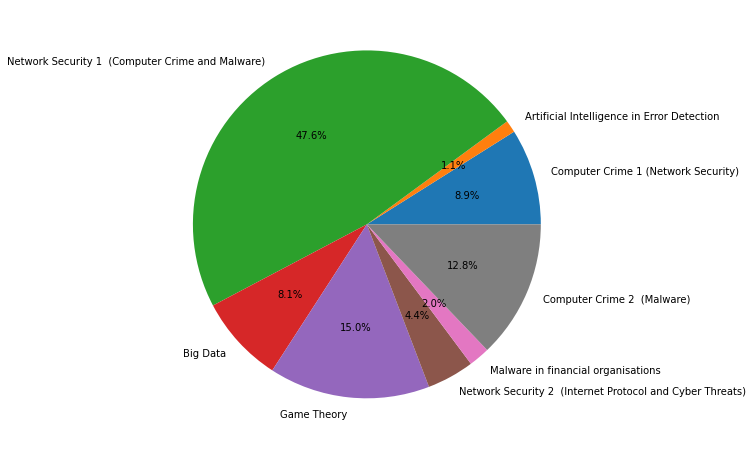

In [8]:
plt.figure(figsize = (8, 8))

plt.pie([55, 7, 293, 50, 92, 27, 12, 79], labels = 
        ["Computer Crime 1 (Network Security)", 
        "Artificial Intelligence in Error Detection",
        "Network Security 1  (Computer Crime and Malware)", "Big Data", "Game Theory",
        "Network Security 2  (Internet Protocol and Cyber Threats)",
        "Malware in financial organisations", "Computer Crime 2  (Malware)"], autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x1c40982f640>,
 [Text(1.0155246232214754, 0.4227407475402395, 'Computer Crime 1 (Network Security)'),
  Text(0.7640003437453178, 0.7913933754821532, 'Artificial Intelligence in Error Detection'),
  Text(-0.6944580174895961, 0.8530697872650396, 'Network Security 1  (Computer Crime and Malware)'),
  Text(-0.8280872561478482, -0.724065947414687, 'Big Data'),
  Text(-0.10058749653311069, -1.0953913252994116, 'Game Theory'),
  Text(0.6199568878983036, -0.908654751348085, 'Network Security 2  (Internet Protocol and Cyber Threats)'),
  Text(0.7527758598572929, -0.8020776177005026, 'Malware in financial organisations'),
  Text(1.0213791683405569, -0.4083926964086804, 'Computer Crime 2  (Malware)')],
 [Text(0.5539225217571684, 0.23058586229467606, '12.6%'),
  Text(0.4167274602247188, 0.4316691138993562, '0.4%'),
  Text(-0.3787952822670524, 0.4653107930536579, '45.7%'),
  Text(-0.4516839578988262, -0.3949450622261929, '5.4%'),
  Text(-0.05486590719987856, -0.59748

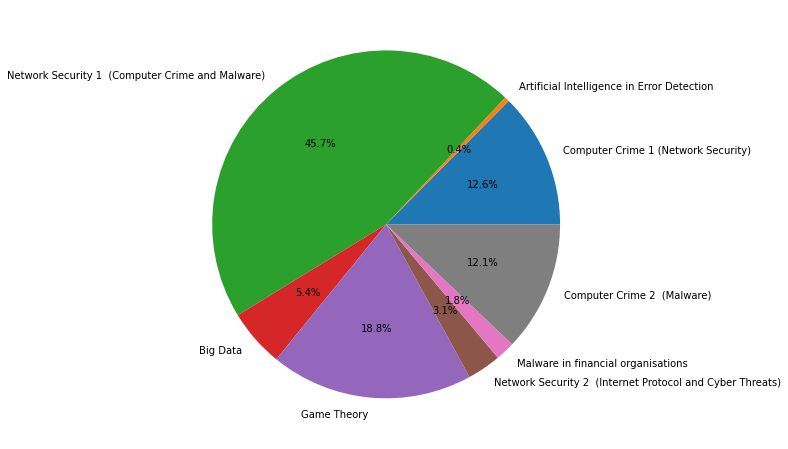

In [9]:
plt.figure(figsize = (8, 8))

plt.pie([28, 1, 102, 12, 42, 7, 4, 27], labels = 
        ["Computer Crime 1 (Network Security)", 
        "Artificial Intelligence in Error Detection",
        "Network Security 1  (Computer Crime and Malware)", "Big Data", "Game Theory",
        "Network Security 2  (Internet Protocol and Cyber Threats)",
        "Malware in financial organisations", "Computer Crime 2  (Malware)"], autopct = '%1.1f%%')

In [11]:
# Authors with the most citations

authors_dict1 = {}

for index in range(len(data)):
    authors = data.iloc[index, 1].split(';')[:-1]
    
    for author in authors:
        if author in authors_dict1.keys():
            val = authors_dict[author]
            authors_dict1[author] = val + int(data.iloc[index, 11])
        else:
            authors_dict1[author] =  1
            
for author in sorted(authors_dict1, key = authors_dict1.get, reverse = True)[:10]:
    print('Author_ID - {}, value - {}'.format(author, authors_dict1[author]))

Author_ID - 56396747600, value - 115
Author_ID - 36609263200, value - 115
Author_ID - 7004051742, value - 114
Author_ID - 56190095000, value - 96
Author_ID - 6601937430, value - 74
Author_ID - 24725118000, value - 74
Author_ID - 57054737600, value - 73
Author_ID - 6602187244, value - 69
Author_ID - 55361987300, value - 67
Author_ID - 24767254400, value - 60
